### Weather in Szeged 2006-2016
Is there a relationship between humidity and temperature? What about between humidity and apparent temperature? Can you predict the apparent temperature given the humidity?

In [50]:
import pandas as pd
import numpy as np

In [51]:
datasets = pd.read_csv("weatherHistory.csv")

In [52]:
datasets

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [53]:
#predict apparent temperature based on humidity

In [54]:
data = datasets.iloc[:,4:6]

In [55]:
data = data.values

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()

In [58]:
print(scaler.fit(data))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [59]:
data = np.array(scaler.transform(data))

In [60]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(data[:,1], data[:,0], test_size=0.33, random_state=42)

In [70]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train.reshape(-1, 1),y_train.reshape(-1, 1))
y_pred= reg.predict(X_test.reshape(-1, 1))

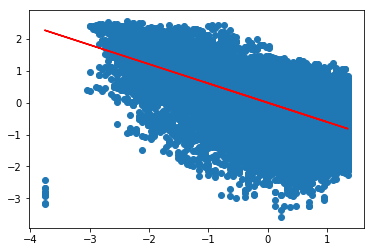

In [71]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,'r')
plt.show()

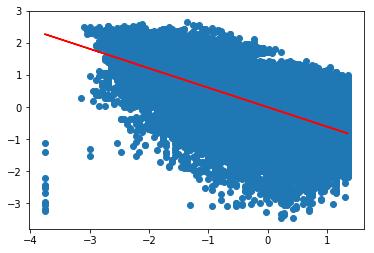

In [72]:
plt.scatter(X_train,y_train)
plt.plot(X_train,reg.predict(X_train.reshape(-1,1)),'r')
plt.show()

In [75]:
reg.coef_

array([[-0.60522804]])

In [76]:
reg.intercept_

array([0.00156514])

### Weather Conditions in World War Two: 

Is there a relationship between the daily minimum and maximum temperature? Can you predict the maximum temperature given the minimum temperature?

In [96]:
datasets = pd.read_csv("maxmin.csv")

C:\Users\smsaurabhv\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [97]:
datasets

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10001,1942-7-6,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001,1942-7-7,T,NaN,28.333333,22.777778,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10001,1942-7-8,3.556,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10001,1942-7-9,T,NaN,27.222222,22.777778,25.000000,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10001,1942-7-10,3.556,NaN,25.555556,21.666667,23.333333,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
#predict maximum temperature based on minimum temperature

In [99]:
data = datasets.iloc[:,4:6]

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [101]:
data = data.values
print(scaler.fit(data))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [102]:
data = np.array(scaler.transform(data))

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(data[:,1], data[:,0], test_size=0.33, random_state=42)

In [105]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train.reshape(-1, 1),y_train.reshape(-1, 1))
y_pred= reg.predict(X_test.reshape(-1, 1))

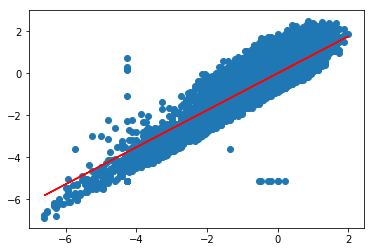

In [106]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,'r')
plt.show()

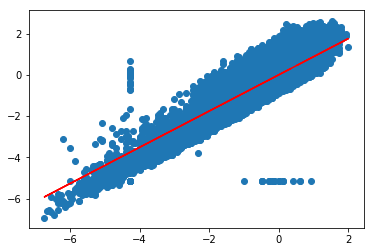

In [107]:
plt.scatter(X_train,y_train)
plt.plot(X_train,reg.predict(X_train.reshape(-1,1)),'r')
plt.show()